In [1]:
%matplotlib inline
import numpy as np 
import networkx as nx
import experiment as ex
import network_generation.generation as ng
import matplotlib.pyplot as plt
import pickle
from scipy import stats

# LCC using networkx

d = 2 done
d = 3 done
d = 6 done
d = 9 done
d = 15 done
d = 25 done


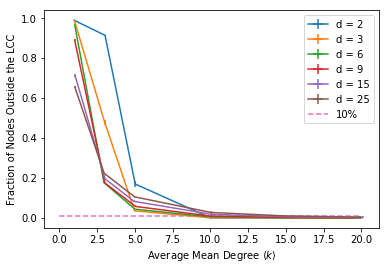

In [3]:
n, boundary = 1000, 's'
d_range = [2,3,6,9,15,25]
kappa_range = [1,3,5,10,15,20]

LCCfig = plt.figure()
LCCax = LCCfig.add_subplot(1,1,1)

for d in d_range:
    num_not_in_LCC = []
    num_not_in_LCC_std = []
    md = [] 
    md_std = []
    RGG = ex.RGGExperiment(kappa_range, n, d, shortcut_prob=0, boundary=boundary,num_radii=10)
    for ensemble in RGG.ensembles:
        num_not_in_LCC_sample = []
        md_sample = []
        for sample in ensemble.samples:
            G =  nx.Graph(sample.adjacency_dense) 
            md_sample.append(sample.mean_degree())
            num_not_in_LCC_sample.append(float(n - len(sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]))/n)
        num_not_in_LCC.append(np.mean(num_not_in_LCC_sample))
        num_not_in_LCC_std.append(stats.sem(num_not_in_LCC_sample))
        md.append(np.mean(md_sample))
        md_std.append(stats.sem(md_sample))
    print 'd = ' + str(d) + ' done'
    LCCax.errorbar(md, num_not_in_LCC, xerr=md_std, yerr=num_not_in_LCC_std,label='d = '+str(d))

legend_handles, legend_strings = LCCax.get_legend_handles_labels()
tenpercent, = LCCax.plot([0,max(kappa_range)],[.01, .01],'--')
legend_handles.append(tenpercent)
legend_strings.append('10%')
LCCax.set_xlabel('Average Mean Degree $\\langle{k}\\rangle$')
LCCax.set_ylabel('Fraction of Nodes Outside the LCC')
LCCax.legend(legend_handles, legend_strings)

LCCfig.savefig('./plots/num_not_in_LCC_BC_'+str(boundary)+'_N_'+str(n)+'.eps',dpi=800)

# validate homemade code

/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


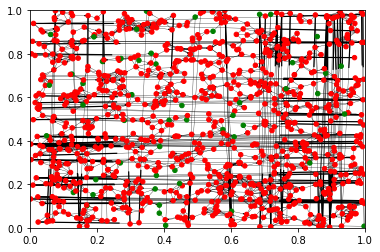

RGG_K_7_N_1000_d_2_BC_p


In [3]:
# generate a net 
kappa = 7
n = 1000
d = 2
boundary = 'p'
num_samples = 1

RGG = ng.RGGEnsemble(kappa, n, d, shortcut_prob=0, boundary=boundary, num_radii=1)
RGG.generate_samples(n=num_samples)
s = RGG.samples[0]
s.plot_network(unmatched=s.find_unmatched(), LCC=False, save=False)
print s.get_param_string()

# change to LCC
# RGG.to_LCC()
# print s.LCC_size
# s.plot_network(unmatched=s.find_unmatched(),LCC=True)

# LCC using homemade code

d = 2 object made
d = 2 LCC extracted
d = 2 done
d = 3 object made
d = 3 LCC extracted
d = 3 done
d = 6 object made
d = 6 LCC extracted
d = 6 done
d = 9 object made
d = 9 LCC extracted
d = 9 done
d = 15 object made
d = 15 LCC extracted
d = 15 done
d = 25 object made
d = 25 LCC extracted
d = 25 done


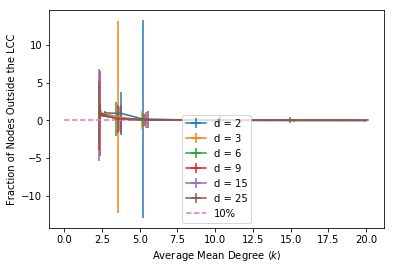

In [5]:
n, boundary = 1000, 's'
d_range = [2,3,6,9,15,25]
kappa_range = [1,3,5,10,15,20]

LCCfig = plt.figure()
LCCax = LCCfig.add_subplot(1,1,1)

for d in d_range:
    frac_not_in_LCC = []
    frac_not_in_LCC_std = []
    md = [] 
    md_std = []
    RGG = ex.RGGExperiment(kappa_range, n, d, shortcut_prob=0, boundary=boundary,num_radii=10)
    print 'd = ' + str(d) + ' object made'
    RGG.to_LCC()
    print 'd = ' + str(d) + ' LCC extracted'
    mean_n_list, std_n_list, _ = RGG.find_n_stats()
    mean_degree_list, std_degree_list, _ = RGG.find_degree_stats()
    frac_not_in_LCC = [(RGG.n - nn)/RGG.n for nn in mean_n_list]
    LCCax.errorbar(mean_degree_list, frac_not_in_LCC, xerr=std_degree_list, yerr=std_n_list,label='d = '+str(d))
    print 'd = ' + str(d) + ' done'

legend_handles, legend_strings = LCCax.get_legend_handles_labels()

tenpercent, = LCCax.plot([0,max(kappa_range)],[.01, .01],'--')
legend_handles.append(tenpercent)
legend_strings.append('10%')
LCCax.set_xlabel('Average Mean Degree $\\langle{k}\\rangle$')
LCCax.set_ylabel('Fraction of Nodes Outside the LCC')
LCCax.legend(legend_handles, legend_strings)

LCCfig.savefig('./plots/frac_not_in_LCC_BC_'+str(boundary)+'_N_'+str(n)+'.eps',dpi=800)


# visualize some nets 

to compare ER and RGG

2.56
(25, 25)


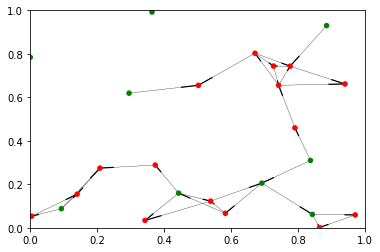

In [9]:
# generate a net 
kappa = 3
n = 25
d = 2
boundary = 's'
num_samples = 1

RGG = ng.RGGEnsemble(kappa, n, d, shortcut_prob=0, boundary=boundary, num_radii=10)
RGG.generate_samples(n=num_samples)
s = RGG.samples[0]
G = nx.DiGraph(s.adjacency_dense)
print 2*float(nx.number_of_edges(G))/n
print np.shape(s.adjacency)
s.plot_network(unmatched=s.find_unmatched())

2.56


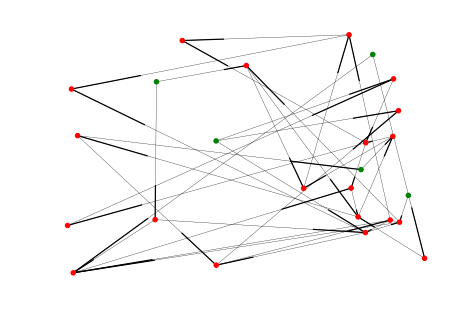

In [10]:
ER = ng.EREnsemble(kappa, n)
ER.generate_samples(n=num_samples)
p = ER.samples[0]
p.plot_network(unmatched=p.find_unmatched())
# G = nx.DiGraph(p.adjacency_dense)
print 2*float(nx.number_of_edges(G))/n
# nx.draw_random(G,node_size=5,width=0.2)